<img src="https://drive.google.com/uc?id=1YLNtm8gNsviTEnVXzfiby2VMKrc0XzLP" width="500"/>

---


# **Deep learning module introduction**

#### **Morning contents/agenda**

0. Start at the end

1. Description of the module's contents, materials and resources:
  - github repository
  - schedule and assessments
  - teaching team

2. Google Colab introduction

3. Deep learning?

4. Why `PyTorch`?

5. A simple feed-forward network (FFN) with `PyTorch`

#### **Learning outcomes**

1. Overview the module contents and how they will be delivered

2. Understand the assessment process for the module

3. First contact with `PyTorch` and FFNs

<br>


#### **Afternoon contents/agenda**

1. https://playground.tensorflow.org

2. Improving our simpleFFN

#### **Learning outcomes**

1. Understand the effect of different network configurations with tensorflow

2. Break the morning example and raise questions about how `PyTorch` works.

$$\\[2cm]$$

---

<br>


## 0. Start at the end

I want to start this module by addressing three basic questions:
- **Why** are we doing this module?
- **How** is that useful for your career?
- **What** are we going to learn?

$$\\[2cm]$$

Let's see what the state-of-the-art in deep learning looks like. We will see a couple more examples on state-of-the-art image generation later today, but for now let's focus on what everybody knows about:

[chatGPT 4](https://chat.openai.com/) \\
[Google Gemini](https://bard.google.com/chat)

Let's ask these models some relatively simple questions:

- *Write a sentence with 10 words where every word starts with the same letter as the previous word finishes*
- *If I have three eggs, and two needles, and a laptop, how can I build the tallest tower that is stable?*

**How did these models do?** By the end of the module, we will have seen what are the building blocks that make this type of networks (and others) perform as well as they do.

<br>

---

<br>


## 1. Description of module's contents

Information about the module can be found in this github repo:

https://github.com/ese-ada-lovelace-2024/DL_Module_2024

The repository contains all the teaching materials (which will be released as the module progresses), dates for assessments, primer material, bibliography, and other useful information.

<br/>

---

<br/>

## 2. Google Colab

During the module we will use [Google Colab](https://colab.research.google.com/).

You will need to have access to a Google Account.

#### **I strongly suggest that you make a dedicated google account for this module**

During the first break of the morning, you will create a new google account that you will only use for this module. Do not reuse your existing google accounts because we will be providing you with the means to activate a Colab Pro pay-as-you-go license on Wednesday 4th December to provide you additional compute capabilities for the courseworks. Until then, you can use the free version of Colab.


**WEDNESDAY 4 DECEMBER @ 11:30H WE WILL SET UP OUR COLAB PRO ACCOUNTS IN CLASS**

<br>

### **Mounting your google drive**

You can use google drive to store and access files e.g. storing and loading data from numpy or CSV files.
Use the following command to mount your GDrive and access your files:


In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


### **Using the GPU**

Google Colab enables us to obtain free GPU computing resources.  
You can switch the runtime of Google Colab from CPU to GPU based via the ```toolbar```:  

Commands:
```Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU```

In [2]:
import torch

device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")
    device = 'cpu'

Cuda installed! Running on GPU!


But when using the free version of Colab, you will only have access to one GPU at a time. You can change your runtime type by:

```Runtime -> Change Runtime Type -> Hardware Accelerator -> CPU```

If you are not actively training a network, or even if the training is not very demanding computationally, you can switch to CPUs.

### **Using Git Repositories**

You can clone Git repositories as well!
(You can even commit to Git Repositories via ```File -> Save a copy in Github```)
Use the ```%cd [directory]``` jupyter cell-magic to access the folder.

In [3]:
!git clone https://github.com/josephmisiti/awesome-machine-learning
%cd awesome-machine-learning

Cloning into 'awesome-machine-learning'...
remote: Enumerating objects: 4874, done.
remote: Counting objects: 100% (442/442), done.
remote: Compressing objects: 100% (271/271), done.
remote: Total 4874 (delta 251), reused 338 (delta 170), pack-reused 4432 (from 1)
Receiving objects: 100% (4874/4874), 2.48 MiB | 10.06 MiB/s, done.
Resolving deltas: 100% (2535/2535), done.
/content/awesome-machine-learning


In [4]:
!ls
!du -sh

blogs.md  courses.md  LICENSE	  ml-curriculum.md  scripts
books.md  events.md   meetups.md  README.md
3.1M	.


### **Saving and Storing Colab Notebooks Locally**

Google Colab stores notebooks automatically but you can also save and store your work manually:

```File -> Save ```

or download the .ipynb file:

```File -> Download .ipynb ```

<br/>

---

<br/>

## 3. Deep Learning?

### **What is deep learning?**


[From Wikipedia](https://en.wikipedia.org/wiki/Deep_learning):

*Deep learning is a class of machine learning algorithms that[8]: 199–200  uses multiple layers to progressively extract higher-level features from the raw input. For example, in image processing, lower layers may identify edges, while higher layers may identify the concepts relevant to a human such as digits or letters or faces.*

<br>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/AI-ML-DL.svg" width="400"/></center>

$$\\[2cm]$$

### **Why do we need deep learning?**

The [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem) (in the case of arbitrary width) states that a single-layer network with sufficient neurons is a universal approximator for univariate functions, but not for multivariate functions. If we want networks to capture more complex data distributions, then we need to introduce more complexity by adding layers (i.e., increase the depth of the network).

<br>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/9/99/Neural_network_example.svg" width="200"/></center>

$$\\[2cm]$$

### **Neurons: the basic building blocks of deep learning**

We have been talking about neurons, layers, and networks as the basic building blocks of deep learning. But, what do these concepts mean?

What we call neurons in deep learning is loosely inspired by how biological neurons work:

<br>

<center><img src="https://drive.google.com/uc?id=1vk5DzUD7Y8iQvvXmYvdBOC1Ih43XzWUy" width="500"/></center>

<br>

In simplified terms, biological neurons receive multiple inputs (through their dendrites), combine them together (within the cell body), and then apply a non-linear threshold to determine whether to become activated or remain deactivated. If activated, the neuron then sends an output inpulse (through its axon).

Similarly, our artificial neurons receive multiple inputs (each corresponding to a single numerical value), combine them using some linear function (e.g. a weighted sum in feed-forward neural networks or a convolution in convolutional neural networks), and apply a non-linear **activation function** to the result. The result of this operation is then passed on as the neuron's output:

<br>

<center><img src="https://drive.google.com/uc?id=1MmBR_zW_peAZjsyHLJGTWLs9WRICdcOX" width="800"/></center>

<br>

The linear operation that neurons perform is not fixed by design. Instead, it depends on some weights, which we will define formally later, that we call **parameters**. These parameters are fine-tuned through a process that we call **training**.

Individual neurons are stacked together to form layers, and layers are concatenated to form networks:

<br>

<center><img src="https://drive.google.com/uc?id=1eXIdCncuBhYzc50qRheu1pWd49Iu-Q_O" width="500"/></center>

<br>

$$\\[1cm]$$

### **Origins of AI**

<br>

<img src="https://drive.google.com/uc?id=1STE1tkh98Lrm64ukF6Yxi6squyxcOQRl" width="800"/>

$$\\[2cm]$$


### **Applications of ML and DL**

- **Finance**: predict patterns at short and long scales.

- **Health**: triage and diagnostic, image segmentation, automated data handling, and a long etc.

- **Retail**: offer personal recommendations based on recent choices of products.

- **Marketing**: organize customers into classes based on their past behavior.

- **Automotive**: self-driving vehicles, safety technology, etc.

- **Media**: generate images of non-existing people for synthetic scenes.

- **Art**: synthetic generation of music, text or paintings mimicking styles of well known artists,

- …and **Science**, of course.

<br>

Modern networks perform complex tasks at levels that a few years ago would seem like science-fiction:

<br>

- GPT-3 \[175 billion parameters\] & GPT-4 \[1.7 trillion parameters\]

<center><img src="https://drive.google.com/uc?id=1cN5IIz6nRNQVySwywm7YcEGh5DOH39Dh" width="800"/></center>

<br>

- Alphafold \[21 million parameters\]

<center><img src="https://drive.google.com/uc?id=1u9yqERCWyRQ6uZzlfXPC-IT6jPNK9vkC" width="800"/></center>

<br>

- [DALL·E 2](https://labs.openai.com/) \[3.5 billion parameters\] & [DALL·E 3](https://openai.com/dall-e-3) \[?? parameters\]:


DALL·E 2 | DALL·E 3
- | -
<img src="https://drive.google.com/uc?id=1fyiaaWidUeUhXD738V01MT7IaFejURD2" width="500"/>| <img src="https://drive.google.com/uc?id=1Cyj8UKTjabb-UyBWZJmjJUi87ur1BN3k" width="500"/>

<center>origami sculpture of a knight holding his shield while fighting a fire breathing dragon, slight depth of field </center>

<br>

DALL·E 2 | DALL·E 3
- | -
<img src="https://drive.google.com/uc?id=1nNpJ-QIhdPbZvGTHlMHFvLLTMCsWnC4w" width="500"/> | <img src="https://drive.google.com/uc?id=1m75eEO2oY8UMX2vCyLxuNIAPKdlbCM7l" width="500"/>

<center>a class of deep learning students in the style of classic roman painting</center>

<br>

another DALL·E 3 output: \\
(how do you think the prompt was changed to generate this one?)

<img src="https://drive.google.com/uc?id=1Dm4VrgQ02cKGHmAKqHz4OoLYJCQxzfDc" width="500"/>

<br>
<br>

DALL·E 2 | DALL·E 3
- | -
<img src="https://drive.google.com/uc?id=1c_F9BRPPmUgB4q8qfW4lvIBNP8ZWk8qw" width="500"/> | <img src="https://drive.google.com/uc?id=1-sDOLM_AOVrZI0A5Muc-2FBoF-qbbxNE" width="500"/>

<center>highest possible stacked tower using four eggs, a book, two rugby balls, and a pack of cards</center>

<br>


<br>

- ...and many others that we will discuss during the module.

$$\\[2cm]$$

### **Godfathers of deep learning**

Perhaps the three most important contributors in the field are Yoshua Bengio, Yann LeCunn, and Geoffrey Hinton (Nobel Prize in Physics 2024!):

<br>

<center><img src="https://drive.google.com/uc?id=1Y1S2GUZUK67_JSFaCDqknTcRief97Ije" width="500"/></center>

- Turing Award [video](https://www.youtube.com/watch?v=HzilDIhWhrE)

- AAAI (Association for the Advancement of Artificial Intelligence) award [video](https://www.youtube.com/watch?v=UX8OubxsY8w)

They are involved in the development of a significant number of concepts we will learn over the next three weeks.

$$\\[2cm]$$

### **The data explosion behind machine learning**

Machine learning, and deep learning in particular, rely on having access to very large amounts of data. Over the last decade the world has experienced an exponential growth of data creation.

<br>

<img src="https://drive.google.com/uc?id=1dW45nnliVyJ-rqRM1af_0iChsc-iY87i" width="800"/>


`1 zettabyte = 10^21 bytes`

Such volumes **demand automated solutions** to extract and use existing patterns in the data.



<br>

---

<br/>


## 4. Why `PyTorch`?

First of all, why Python at all? According to the [Kaggle survey](https://www.kaggle.com/kaggle-survey-2022), Python is the most popular programming language for data science and machine learning:

<center><img src="https://lh5.googleusercontent.com/0eRpLN5qo-YGtM9lb3_8obDkl4w8O82EE0QBVLV2SSwrZMSMj4UJyKgAhVr2UMp4wP3M29BPoCm-KMGpZRl_9qqFgkS3uzWHCuY6mbdPqPNTQ-gQY_Ve24nIHv9bSbaBk4msWAG4l6KumlYT3aMNzcRW5Cr2QTBBPTLxLF8F7yZco4m1L6Q0sTC9hhEH9enyCKQ" width="700"/></center>

`PyTorch` tends to be the preferred framework in academic research environments, whereas `Tensorflow` is mostly used in production and deployment. According to the same survey, `PyTorch` is still in its growing phase, whereas `TensorFlow/Keras` is in slight decline:

<center><img src="https://lh4.googleusercontent.com/m-r1FHxaE0olotAgkbK4H3csXjsZ5KhDYIHJlvmSTTATg1LmdpiAcGPslrnwXM06M6eJU1mOQtaxC6lrIuXsrFSMvJP06j9_EaF2DUsuVLMeZo2WLmhfq5_tizRlxgBnBESPrkK2MRsDa9oy2vy6rlf_ydWiMPNf0ZNJuuF6BtZfVXBrGxyFG1EUnbc9Z_pAgKM" width="700"/></center>

But don't read too much into these numbers, at the end of the day, the choice of `PyTorch` is arbitrary and responds to the personal preferences of the teaching team, and the fact that we are a research institution.

Finally, Google Colab is the most widely used cloud notebook solution, where the trend indicates that it will likely dominate the market in the coming years:

<center><img src="https://lh4.googleusercontent.com/Ax-MHWndntRG1_FJKOez0UkpfgklOOFldSv6euggJC1UoGR_9xMs-5vIiivjR88XBR-iLhc_5q3Xo5IRzc_ZOonYRIx5TUnZ9o-Go3SMICwh1ylGstwCY4HIzS4pX08X_XB2BuBQGHP9nR2-0_eg6IRuSujvo3fYQeClDnHnX7KYvjlAwRvlipI-l14jEeLXKM8" width="700"/></center>






<br>

---

<br/>



## 5. A simple feed-forward network (FFN) with `PyTorch`

We will devote the rest of the morning to implement a rather shallow feed forward network using `PyTorch`.

But first, let's clarify a few concepts.

### **What is a feed-forward network?**

In essence, is this:

In [ ]:
%%html
<iframe src="https://www.3blue1brown.com/lessons/neural-networks" width="1200" height="700"></iframe>

Given some input, the network performs operations on its elements (pixels in this case, but does not have to be!) a few times (through layers), and then outputs some data at the end (in this case, the probability of the input to be a particular hand-written digit).

But what are these components that we represent as circles in the network? They are the neurons of the network, which we have represented before like this:

<br>

<center><img src="https://drive.google.com/uc?id=1AtQhgLLuGKiLi8neVLNo1xQ91rfW7XLj" width="800"/></center>


and can be converted to mathematical operations like this:

<img src="https://drive.google.com/uc?id=1rAh2U6ejO54rptSXbHTYqiTYg78mvOTe" width="800"/>

But so far, we have only seen how a network performs what is called a **forward pass**

\[***SIDE NOTE***:
*Due to the field being relatively young and covering a very wide range of applications, nomenclature in DL (and ML in general) is far from consistent. We will see that $\theta$ values are often referred as $w$ and $b$ (for $w$eights and $b$iases), for example.*\]

<br>





The parameters $\theta_{ij}^{(k)}$ of the network control how well the network performs a task (assigns a digit to its correct class in this particular example). As you can see, the network in the gif above already knows what it's doing, given that the last layer provides the largest probability to the correct class.

But when we attack a new problem, we only have a dataset and the intention to use a neural network to solve the problem. We will not talk today about how to choose the best network architecture (that is, how many hidden layers, how many neurons per layer, what activation functions to use, etc.), as this will be covered over the course of the module.

Let's assume for now that we have decided to use a particular network architecture. This network is untrained, and by that we mean that since it has never seen the data, we have no idea of what the network parameters should be. The common approach is then, to assign random numbers to these parameters and see what happens.

This happens:

<br>

<img src="https://www.3blue1brown.com/content/lessons/2017/gradient-descent/random-trash.png" width=800>

<br>

So the question now is how do we improve these parameters so that the network does what we want (which is to correctly classify my digits in this case)? The answer is to **train the network**.

Training means that we will use known information about our data (its inherent structure, or some labels associated to it, for example) to modify the parameters $\theta$ of our network. We do this by defining a **loss function** that captures the accuracy of the predictions of our network.

<br>

<img src="https://drive.google.com/uc?id=1mztVlVpRmWk5_mjH3wERPI-YGkX-47pY" alt="Gradient descent, how neural networks learn | Chapter 2, Deep learning" width="800">

<br>

We use local optimisation techniques (based on the gradient-descent method and its numerous variations) to train our networks. Why do we do this instead of exploring all the possible combinations of parameters and picking the one that performs best? *Remember how many parameters where there in some of the networks above?*

The **loss function** defines a hypersurface in a multi-dimensional space that has as many dimensions as there are network parameters. This hypersurface is known as the [solution space, the feasible region, the search space or the feasible set](https://en.wikipedia.org/wiki/Feasible_region).

The goal of training is to find the lowest value in this solution space (or at least a sufficiently low local minimum). In a very simple case with two dimensions (two network parameters) we will do this:

<img src="https://drive.google.com/uc?id=13y_aSC-9QBHBXJr0CvQzDRCxyxoPQtJP" alt="optimisation" width="500"/>

<br>

And in order to achieve this we will use **backpropagation**.

**Backpropagation** is a method that will let us improve our network parameters by iteratively updating them in a direction that reduces the magnitude of the loss.

And now, it (hopefully) has become clearer why we use local optimisation: we can afford to compute the value of the loss for a particular set of $\theta$ values, as well as the gradient of the loss with respect to these $\theta$ values using backpropagation. But using a global method (like Monte Carlo optimisation) would be unaffordable because that would require to run forward passes of the network a ridiculously large number of times (remember we are optimising a loss that depends on many parameters, or dimensions).

Coming back to why we use `PyTorch` (or any other framework really): **we use it to avoid having to manually code the backpropagation algorithm for every network that we use.**


### **Testing a simple FFN with `PyTorch`**

\[***NOTE***:
*Wednesday's lecture will be dedicated to understanding how to use `PyTorch`. In the example below you can skip the code definition for now, don't worry if it does not quite make sense yet. You can come back to revisit the code after we have introduced `PyTorch`.*\]

### Code definition - Skip to Network training for now

In [5]:
!pip install pycm livelossplot
%pylab inline

# Let's start by importing some Python and `Pytorch` libraries and define a random seed to be able to replicate our results.
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

from livelossplot import PlotLosses
from pycm import *

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torchsummary import summary

def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = False  # uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms. Useful when inputs do not change size -
    torch.backends.cudnn.enabled   = False

    return True

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.3/606.3 kB 41.2 MB/s eta 0:00:00
Populating the interactive namespace from numpy and matplotlib


We create a class called `simpleFFN` and we test that it reads an input and gives us an output:

In [6]:
class simpleFFN(nn.Module):
  def __init__(self, num_hidden=(200, 50), bias=False, activation=nn.Sigmoid):
    super(simpleFFN, self).__init__()

    hidden_input = 784
    self.len_hidden = len(num_hidden)
    for idx, n in enumerate(num_hidden):
        setattr(self, 'hidden_%d' % idx, nn.Linear(hidden_input, n, bias=bias))
        hidden_input = n
    self.output = nn.Linear(hidden_input, 10, bias=bias)

    self.activation = activation()

  def forward(self, x):
    for idx in range(self.len_hidden):
        hidden = getattr(self, 'hidden_%d' % idx)
        z = hidden(x)
        x = self.activation(z)
    z = self.output(x)
    o = self.activation(z)
    return o

x = torch.randn((1, 1, 784))
model_test = simpleFFN()
y = model_test(x)
print(y)
print(model_test)



tensor([[[0.4939, 0.3946, 0.5067, 0.4720, 0.4549, 0.5682, 0.4092, 0.5311,
          0.5074, 0.4980]]], grad_fn=<SigmoidBackward0>)
simpleFFN(
  (hidden_0): Linear(in_features=784, out_features=200, bias=False)
  (hidden_1): Linear(in_features=200, out_features=50, bias=False)
  (output): Linear(in_features=50, out_features=10, bias=False)
  (activation): Sigmoid()
)


We download the MNIST dataset:

In [7]:
mnist_train = MNIST("./", download=True, train=True)
mnist_test = MNIST("./", download=True, train=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:18<00:00, 550kB/s] 


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 132kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:06<00:00, 244kB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 9.63MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



We split the data in training, validation, and test sets:

In [8]:
# split the data
shuffler = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42).split(mnist_train.train_data, mnist_train.train_labels)
indices = [(train_idx, validation_idx) for train_idx, validation_idx in shuffler][0]

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


We standardise the data.

\[***NOTE***:
*As we will see in the coming weeks, even though this step is not strictly necessary, it does result in better performance because we are assuming that our data has some underlying Gaussian distribution (the errors rather). In general, it is good practice to standardise our data as it improves convergence speed and results in better generalisation.*\]

In [9]:
def apply_standardization(X): # define an standardisation function
  X /= 255.
  X -= 0.1307
  X /= 0.3081
  return X

# standardise the data
X_train, y_train = apply_standardization(mnist_train.train_data[indices[0]].float()), mnist_train.train_labels[indices[0]]
X_val, y_val = apply_standardization(mnist_train.train_data[indices[1]].float()), mnist_train.train_labels[indices[1]]
X_test, y_test =  apply_standardization(mnist_test.test_data.float()), mnist_test.test_labels

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


We create TensorDatasets (more on this on the next two days):

In [10]:
# create the TensorDatasets containing mnist_train, mnist_validate, and mnist_test
mnist_train = TensorDataset(X_train, y_train.long())
mnist_validate = TensorDataset(X_val, y_val.long())
mnist_test = TensorDataset(X_test, y_test.long())

And we plot one of the elements of the training set (to check we loaded the data correctly)

tensor(0.0001) tensor(1.0003)


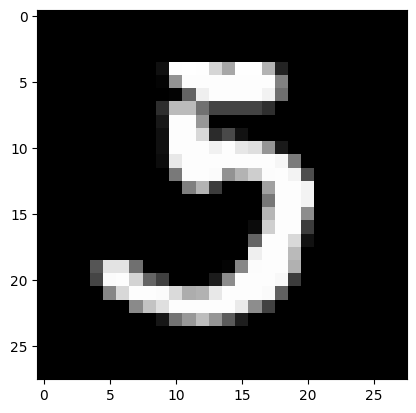

In [11]:
plt.imshow(X_train[11], cmap = 'gray')
print(X_train.mean(), X_train.std())

Now we are going to define functions to train and validate our network:

In [12]:
def train(model, optimizer, criterion, data_loader):
    model.train()                         # the model is in the training mode so the parameters(weights)to be optimised will be updated
    train_loss, train_accuracy = 0, 0     # initialise loss and accuracy to 0 for training
    for X, y in data_loader:              # iterate over the mini-batches defined in the data loader
        X, y = X.to(device), y.to(device) # send data to the device (GPU in our case)
        optimizer.zero_grad()             # resetting optimiser info
        a2 = model(X.view(-1, 28*28))     # forward pass
        loss = criterion(a2, y)           # compute loss
        loss.backward()                   # backpropagation to calculate the gradients
        train_loss += loss*X.size(0)      # # add it up for different mini-batches and undo loss normalisation
        y_pred = F.log_softmax(a2, dim=1).max(1)[1]  # get predictions
        train_accuracy += accuracy_score(y.cpu().numpy(), y_pred.detach().cpu().numpy())*X.size(0) # compute accuracy
        optimizer.step()                  # perform a step of gradient descent

    return train_loss/len(data_loader.dataset), train_accuracy/len(data_loader.dataset)  # here we can average over the whole dataset


def validate(model, criterion, data_loader):      # does not need optimiser
    model.eval()                                  # model is set to evaluation mode so no dropout or any other funny stuff here
    validation_loss, validation_accuracy = 0., 0. # initialise loss and accuracy to 0 for training
    for X, y in data_loader:                      # iterate over the mini-batches defined in the data loader
        with torch.no_grad():                     # deactivates autograd engine
            X, y = X.to(device), y.to(device)     # send data to the device (GPU in our case)
            a2 = model(X.view(-1, 28*28))         # forward pass
            loss = criterion(a2, y)               # evaluate loss
            validation_loss += loss*X.size(0)     # add it up for different mini-batches and undo loss normalisation
            y_pred = F.log_softmax(a2, dim=1).max(1)[1]  # get predictions
            validation_accuracy += accuracy_score(y.cpu().numpy(), y_pred.cpu().numpy())*X.size(0) # compute accuracy

    return validation_loss/len(data_loader.dataset), validation_accuracy/len(data_loader.dataset)  # here we can average over the whole dataset

In order to figure out how good it is, we need to implement an evaluate function:

In [13]:
def evaluate(model, data_loader):
    model.eval()
    ys, y_preds = [], []
    for X, y in data_loader:
        with torch.no_grad():
            X, y = X.to(device), y.to(device) # data and labels to device
            a2 = model(X.view(-1, 28*28))     # forward pass and reshape tensor and get it ready to the fully connected layer
            y_pred = F.log_softmax(a2, dim=1).max(1)[1] # calculate prediction
            ys.append(y.cpu().numpy())        # save predictions
            y_preds.append(y_pred.cpu().numpy()) # save predictions

    return np.concatenate(y_preds, 0),  np.concatenate(ys, 0) ## concatenate the labels of each batch into a single list

Let's also create a function to instantiate our model and send it to the device:

In [14]:
def create_model(*args, **kwargs):
    model = simpleFFN(*args, **kwargs).to(device)                                              # instantiate model and send it to the GPU
    return model

And now we are ready to train our network:

In [15]:
def train_loop(model, seed, lr, momentum, batch_size, test_batch_size, n_epochs):
    set_seed(seed)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)   # instantiate the optimizer
    criterion = nn.CrossEntropyLoss()

    train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=0) ## num_workers=0 means that the main process will retrieve the data.
    validation_loader = DataLoader(mnist_validate, batch_size=test_batch_size, shuffle=False, num_workers=0)
    test_loader = DataLoader(mnist_test, batch_size=test_batch_size, shuffle=False, num_workers=0)

    liveloss = PlotLosses()    # plots evolution of loss and accuracy
    for epoch in range(n_epochs):
        logs = {}
        train_loss, train_accuracy = train(model, optimizer, criterion, train_loader)

        logs['' + 'log loss'] = train_loss.item()
        logs['' + 'accuracy'] = train_accuracy

        validation_loss, validation_accuracy = validate(model, criterion, validation_loader)
        logs['val_' + 'log loss'] = validation_loss.item()
        logs['val_' + 'accuracy'] = validation_accuracy

        liveloss.update(logs)
        liveloss.draw()
        print(validation_loss.item())

    return train_loader, validation_loader, test_loader

### Network training

Select the hyperparameters of our training (we will learn what each of these does during our second lecture):

In [16]:
seed = 42 ## ## keep at that if you want to get almost the exact same results (down to numerical precision I guess)
lr = 1e-2 ##
momentum = 0.9 ##
batch_size = 64 ##
test_batch_size = 1000 ##
n_epochs = 30 ##

Select the hyperparameters of our network:

In [17]:
num_hidden = (200, 50)##   # number of neurons in each hidden layer - in this case, we use 2 hidden layers: hidden_0 with 200 neurons and hidden_1 with 50 neurons
bias = False ##         # no bias
activation = nn.Sigmoid ##   # sigmoid activation function

Let's create our network model:

In [18]:
model = create_model(num_hidden=num_hidden, bias=bias, activation=activation)
print(model)

simpleFFN(
  (hidden_0): Linear(in_features=784, out_features=200, bias=False)
  (hidden_1): Linear(in_features=200, out_features=50, bias=False)
  (output): Linear(in_features=50, out_features=10, bias=False)
  (activation): Sigmoid()
)


And now we are ready to train our network and display the evolution in real time:

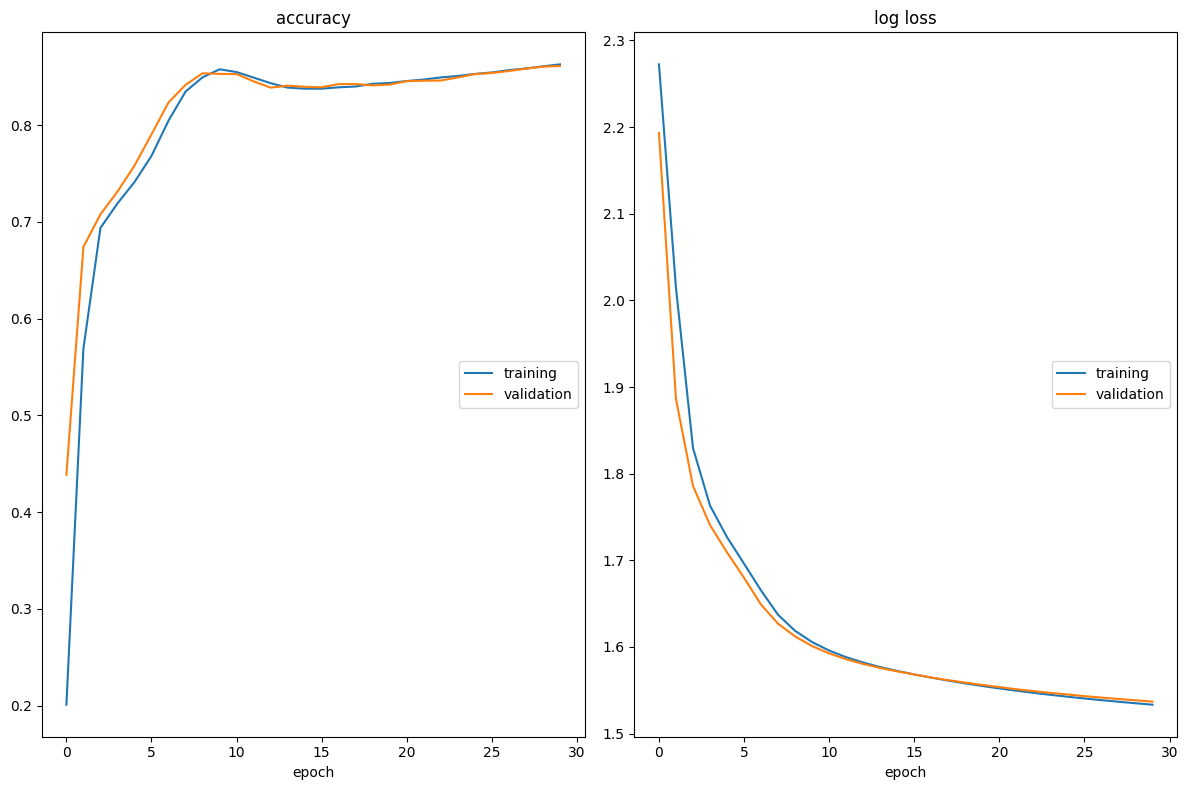

accuracy
	training         	 (min:    0.201, max:    0.863, cur:    0.863)
	validation       	 (min:    0.439, max:    0.861, cur:    0.861)
log loss
	training         	 (min:    1.533, max:    2.272, cur:    1.533)
	validation       	 (min:    1.537, max:    2.193, cur:    1.537)
1.536864995956421


In [19]:
train_loader, validation_loader, test_loader = train_loop(model, seed, lr, momentum, batch_size, test_batch_size, n_epochs)##

**Voila**, we have now trained our network.

In order to figure out how good it is, let's `evaluate` it:

In [ ]:
y_pred, y_gt = evaluate(model, test_loader)##
print(y_pred, y_gt)

Now we want to calculate the confusion matrix of the results we just generated, and plot it:

In [ ]:
cm = ## # Create the confusion matrix from Data. ConfusionMatrix is a class derived from the pycm library
print(cm)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6,6))
##
##

<br>

---

<br>